## 필요한 추가 라이브러리 설치

In [1]:
!pip install timm

     ---------------------------------------- 0.0/42.4 kB ? eta -:--:--
     -------------------------------------- - 41.0/42.4 kB ? eta -:--:--
     -------------------------------------- 42.4/42.4 kB 684.3 kB/s eta 0:00:00
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   --------------------- ------------------ 1.2/2.3 MB 39.6 MB/s eta 0:00:01
   ---------------------------------------  2.3/2.3 MB 36.6 MB/s eta 0:00:01
   ---------------------------------------  2.3/2.3 MB 36.6 MB/s eta 0:00:01
   ---------------------------------------- 2.3/2.3 MB 16.4 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


## 허깅페이스 코드 붙혀넣기

허깅페이스에서 대표적인 Image Segmentation 모델을 찾고 코드 전체를 실행해봅니다.

링크: https://huggingface.co/facebook/detr-resnet-50-panoptic

In [2]:
# 허깅페이스에서 불러온 코드 붙여넣기
import io
import requests
from PIL import Image
import torch
import numpy

from transformers import DetrFeatureExtractor, DetrForSegmentation
from transformers.models.detr.feature_extraction_detr import rgb_to_id

url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open(requests.get(url, stream=True).raw)

feature_extractor = DetrFeatureExtractor.from_pretrained("facebook/detr-resnet-50-panoptic")
model = DetrForSegmentation.from_pretrained("facebook/detr-resnet-50-panoptic")

# prepare image for the model
inputs = feature_extractor(images=image, return_tensors="pt")

# forward pass
outputs = model(**inputs)

# use the `post_process_panoptic` method of `DetrFeatureExtractor` to convert to COCO format
processed_sizes = torch.as_tensor(inputs["pixel_values"].shape[-2:]).unsqueeze(0)
result = feature_extractor.post_process_panoptic(outputs, processed_sizes)[0]

# the segmentation is stored in a special-format png
panoptic_seg = Image.open(io.BytesIO(result["png_string"]))
panoptic_seg = numpy.array(panoptic_seg, dtype=numpy.uint8)
# retrieve the ids corresponding to each mask
panoptic_seg_id = rgb_to_id(panoptic_seg)


c:\Users\qq\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\qq\AppData\Local\Programs\Python\Python310\lib\site-packages\huggingface_hub\file_download.py:159: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\qq\.cache\huggingface\hub\models--facebook--detr-resnet-50-panoptic. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an 

## (심화) 코드 이해하기

### 1. 필요한 라이브러리 임포트
먼저 필요한 라이브러리를 임포트합니다.

- io: 메모리 버퍼를 활용한 이미지 처리
- requests: URL을 통한 이미지 다운로드
- PIL: 이미지를 다루는 Python 라이브러리
- torch: PyTorch 딥러닝 프레임워크
- numpy: 수치 계산을 위한 라이브러리
- matplotlib: 데이터 시각화 라이브러리
- random: 랜덤 컬러 생성 등
- transformers: 사전 학습된 모델과 Feature Extractor를 위한 라이브러리
- rgb_to_id: RGB 값을 ID로 변환하는 유틸리티 함수



In [3]:
# 이미지 처리를 위한 라이브러리들
import io
import requests
from PIL import Image, ImageDraw, ImageFont

# 딥러닝 프레임워크와 관련 라이브러리
import torch
import numpy as np
import matplotlib.pyplot as plt
import random

# DetrFeatureExtractor, DetrForSegmentation 임포트
from transformers import DetrFeatureExtractor, DetrForSegmentation
from transformers.models.detr.feature_extraction_detr import rgb_to_id

### 2. 이미지 로드 및 모델 준비
사전 학습된 모델과 feature extractor를 로드하고 이미지를 준비합니다.

Feature Extractor는 이미지를 컴퓨터가 이해할 수 있는 숫자 형태로 변환해주는 도구입니다. 예를 들어, 사진을 넣으면 그 사진의 특징들을 숫자 벡터로 변환하여 모델이 분석할 수 있도록 만들어 줍니다. 모델이 이미지를 분류하거나 세그멘테이션할 때 중요한 역할을 합니다.

(참고) 함수설명

- Image.open: URL에서 이미지를 다운로드하고 메모리 버퍼에서 로드
- DetrFeatureExtractor.from_pretrained: 사전 학습된 feature extractor를 로드
- DetrForSegmentation.from_pretrained: 사전 학습된 이미지 세그멘테이션 모델을 로드
- feature_extractor(images=image, return_tensors="pt"): 이미지를 모델에 입력하기 위한 텐서로 변환

In [8]:
# 이미지 로드 및 모델 준비
# 웹 상에서 샘플 이미지 로드
# url = "http://images.cocodataset.org/val2017/000000039769.jpg"
# image = Image.open(requests.get(url, stream=True).raw)

# 내 드라이브에서 이미지 로드
image_path = "C:/Users/qq/Downloads/고양이 이미지2.jfif"  # 이미지 경로를 여기에 입력하세요
image = Image.open(image_path)

# 미리 학습된 feature extractor 및 모델 로드
feature_extractor = DetrFeatureExtractor.from_pretrained("facebook/detr-resnet-50-panoptic")
model = DetrForSegmentation.from_pretrained("facebook/detr-resnet-50-panoptic")

# 모델에 입력할 이미지를 준비
inputs = feature_extractor(images=image, return_tensors="pt")

c:\Users\qq\AppData\Local\Programs\Python\Python310\lib\site-packages\transformers\models\detr\feature_extraction_detr.py:38: FutureWarning: The class DetrFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use DetrImageProcessor instead.
  warnings.warn(
Some weights of the model checkpoint at facebook/detr-resnet-50-panoptic were not used when initializing DetrForSegmentation: ['detr.model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked', 'detr.model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'detr.model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'detr.model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing DetrForSegmentation from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This 

### 3. 모델 추론 및 세그멘테이션 변환
모델 추론을 수행하고 결과를 세그멘테이션 이미지로 변환합니다.

(참고) 함수설명,

- model(**inputs): 모델에 입력을 전달하여 추론 수행
- processed_sizes: 입력 이미지의 크기 정보를 텐서로 변환
- feature_extractor.post_process_panoptic: 모델 출력을 COCO 포맷으로 변환
- Image.open(io.BytesIO(result["png_string"])): 추론 결과로부터 PNG 이미지 생성
- np.array(panoptic_seg, dtype=np.uint8): PNG 이미지를 넘파이 배열로 변환
- rgb_to_id: RGB 이미지의 각 픽셀을 ID로 변환

In [9]:
# 모델 추론 및 세그멘테이션 변환
# 모델에 추론을 수행
outputs = model(**inputs)

# 포맷 변환
processed_sizes = torch.as_tensor(inputs["pixel_values"].shape[-2:]).unsqueeze(0)
result = feature_extractor.post_process_panoptic(outputs, processed_sizes)[0]

# 세그멘테이션 PNG를 로드하고 ID로 변환
panoptic_seg = Image.open(io.BytesIO(result["png_string"]))
panoptic_seg = np.array(panoptic_seg, dtype=np.uint8)
panoptic_seg_id = rgb_to_id(panoptic_seg)

c:\Users\qq\AppData\Local\Programs\Python\Python310\lib\site-packages\transformers\models\detr\feature_extraction_detr.py:28: FutureWarning: rgb_to_id has moved and will not be importable from this module from v5. Please import from transformers.image_transforms instead.
  warnings.warn(


### 4. 시각화 준비
세그멘테이션 컬러 팔레트를 생성하고 시각화를 준비합니다.

(참고) 함수설명,

- palette: 세그멘테이션 컬러 팔레트 생성
- np.zeros: 빈 세그멘테이션 맵 생성
- for id_, color in palette.items(): 각 ID별 컬러 할당
- Image.fromarray: 넘파이 배열을 이미지로 변환
- Image.blend: 세그멘테이션 맵을 원본 이미지에 오버레이

In [10]:
# 3. 시각화 준비
# 세그멘테이션을 위한 컬러 팔레트 생성
palette = {id_: [random.randint(0, 255) for _ in range(3)] for id_ in np.unique(panoptic_seg_id)}

# 컬러 세그멘테이션 맵 생성
segmentation_map = np.zeros((panoptic_seg_id.shape[0], panoptic_seg_id.shape[1], 3), dtype=np.uint8)
for id_, color in palette.items():
    segmentation_map[panoptic_seg_id == id_] = color

# 세그멘테이션 맵을 원본 이미지 크기로 리사이즈
segmentation_map = Image.fromarray(segmentation_map).resize(image.size)

# 원본 이미지에 세그멘테이션 맵을 오버레이
overlayed_image = Image.blend(image, segmentation_map, alpha=0.5)

### 5. 레이블 추가 및 결과 시각화
세그멘테이션 이미지에 레이블을 추가하고 결과를 시각화합니다.

(참고) 함수설명,

- ImageDraw.Draw: 이미지를 그리기 위한 객체 생성
- ImageFont.load_default(): 기본 폰트 로드
- result["segments_info"]: 세그멘테이션 결과 정보
- draw.text: 레이블 추가
- fig, ax = plt.subplots: 그래프 영역 생성
- ax[i].imshow: 이미지 표시
- ax[i].axis("off"): 축 비활성화
- ax[i].set_title: 그래프 제목 설정

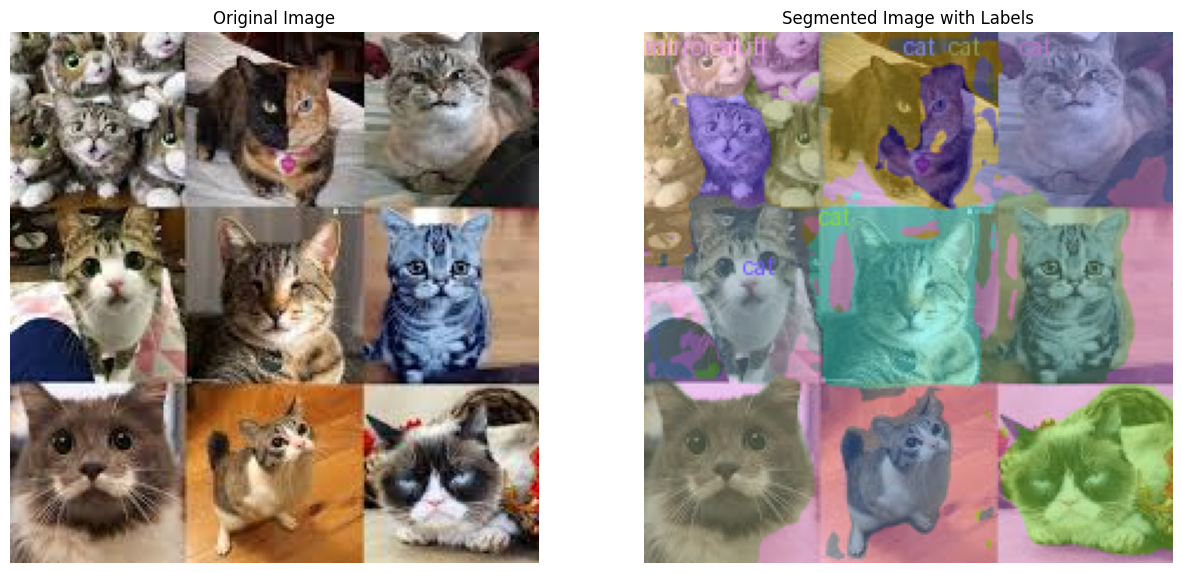

In [11]:
# 오버레이된 이미지에 레이블 추가
draw = ImageDraw.Draw(overlayed_image)
font = ImageFont.load_default()
for segment in result["segments_info"]:
    id_ = segment["id"]
    category_id = segment["category_id"]
    label = model.config.id2label[category_id]

    # 세그멘테이션 마스크 가져오기 및 경계 상자 계산
    mask = panoptic_seg_id == id_
    pos_y, pos_x = np.where(mask)
    min_x, min_y = np.min(pos_x), np.min(pos_y)

    draw.text((min_x, min_y), label, fill=tuple(palette[id_]), font=font)

# 결과 시각화
fig, ax = plt.subplots(1, 2, figsize=(15, 7))
ax[0].imshow(image)
ax[0].axis("off")
ax[0].set_title("Original Image")

ax[1].imshow(overlayed_image)
ax[1].axis("off")
ax[1].set_title("Segmented Image with Labels")

plt.show()